## World Energy Consumption Notebook

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from pandas import to_datetime
from fbprophet import Prophet
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot

In [2]:
# Loading dataset
energy_consumption_dataset = pd.read_csv('World Energy Consumption.csv')
energy_consumption_dataset.head()

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
0,AFG,Afghanistan,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1901,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,1902,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,1903,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,1904,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Data Understanding and quick Manipulation

In [3]:
def know_about_data(dataframe):
    print(f'Total no. of Rows we have {dataframe.shape[0]}')
    print(f'Total no. of Columns we have {dataframe.shape[1]}')
    print(f'Year range starts from {dataframe.year.min()} to {dataframe.year.max()}')

    return dataframe
energy_df_original = know_about_data(energy_consumption_dataset)

def perform_manipulations(dataframe):
    null_valued_columns = [col for col in dataframe.columns if (dataframe[col].isnull().sum(axis=0)/dataframe.shape[0])*100 >= 75.0]
    print(f'\nColumns which have more than 75% of Null values: {len(null_valued_columns)}')
    # Let's get rid of such columns where More than 75% is missing
    filter_df = dataframe.drop(columns = null_valued_columns)
    print(f'Total no. of Columns after cleaning we have {filter_df.shape[1]}')
    
    return filter_df

clean_df = perform_manipulations(energy_df_original)

Total no. of Rows we have 17432
Total no. of Columns we have 122
Year range starts from 1900 to 2020

Columns which have more than 75% of Null values: 59
Total no. of Columns after cleaning we have 63


In [4]:
# Let's check missing values for our iso_code column
clean_df.iso_code.isnull().sum()

1802

We need to finalize the number of years and columns for our Analysis.
Logically we are looking at Energy consmption, hence, we should consider:
1. **Renewables**(renewables_consumption)
2. **Hydro**(hydro_consumption)
3. **Solar**(solar_consumption)
4. **Wind**(wind_consumption)
5. **Any other kind of energy**(other_renewable_consumption)

For Year column, as CHINA's Industrial revolution began around 1990 until Pandemic started, will be our time frame:
- 1990 to 2020

In [5]:
# Total Renewable Energy Consumption
energy_consumption_features = ["iso_code","country", "year", "renewables_consumption","other_renewable_consumption","hydro_consumption","solar_consumption","wind_consumption"]
renewable_consumption_features = ["hydro_consumption","solar_consumption","wind_consumption","other_renewable_consumption"]
energy_df = energy_consumption_dataset.loc[:,energy_consumption_features]

# Create dataframe for yearly energy consumption
year_range = energy_df["year"].isin(range(1990,2020))
energy_df = energy_df[year_range]
energy_consumption_df = energy_df.groupby('year')[renewable_consumption_features].sum()
energy_consumption_df.reset_index(level=0, inplace=True)

energy_consumption_df.head()

,year,hydro_consumption,solar_consumption,wind_consumption,other_renewable_consumption
0,1990,14777.911,3.227,30.175,878.975
1,1991,15087.293,4.184,33.712,919.514
2,1992,15075.032,3.829,38.827,985.570
3,1993,15946.719,4.522,46.595,1024.293
4,1994,15974.073,4.854,57.672,1056.057


In [6]:
energy_consumption_df = know_about_data(energy_consumption_df)
energy_consumption_df = perform_manipulations(energy_consumption_df)

Total no. of Rows we have 30
Total no. of Columns we have 5
Year range starts from 1990 to 2019

Columns which have more than 75% of Null values: 0
Total no. of Columns after cleaning we have 5


##### Q: Year by Year, how Renewable Consumption across the GLOBE has become?

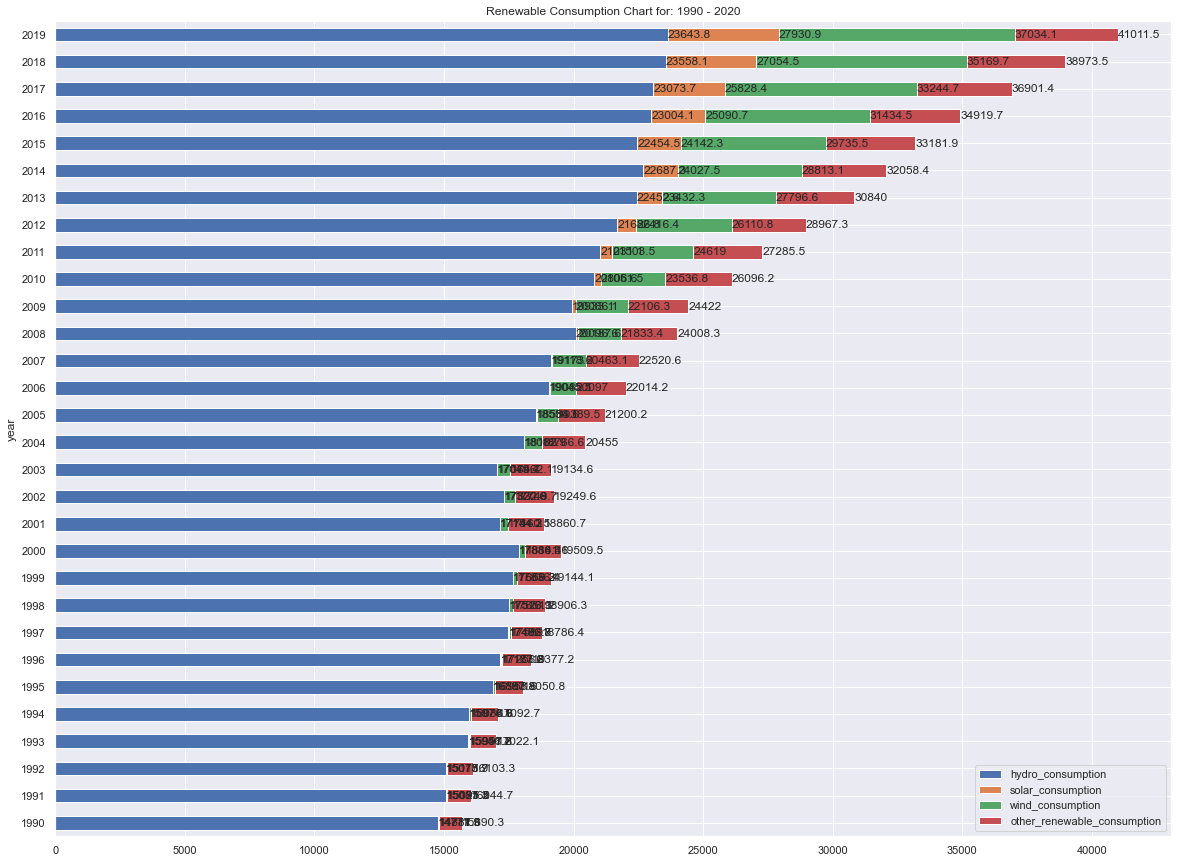

In [7]:
sns.set()
ax= energy_consumption_df.set_index('year').plot(kind='barh', stacked=True,figsize=(20,15),
                                                 title='Renewable Consumption Chart for: 1990 - 2020',
                                                ylabel='Terrawatt Hour')
for c in ax.containers:
    ax.bar_label(c, label_type='edge',fmt='%g');

##### Q: Which Renewable energy has shown highest spike in consumption?

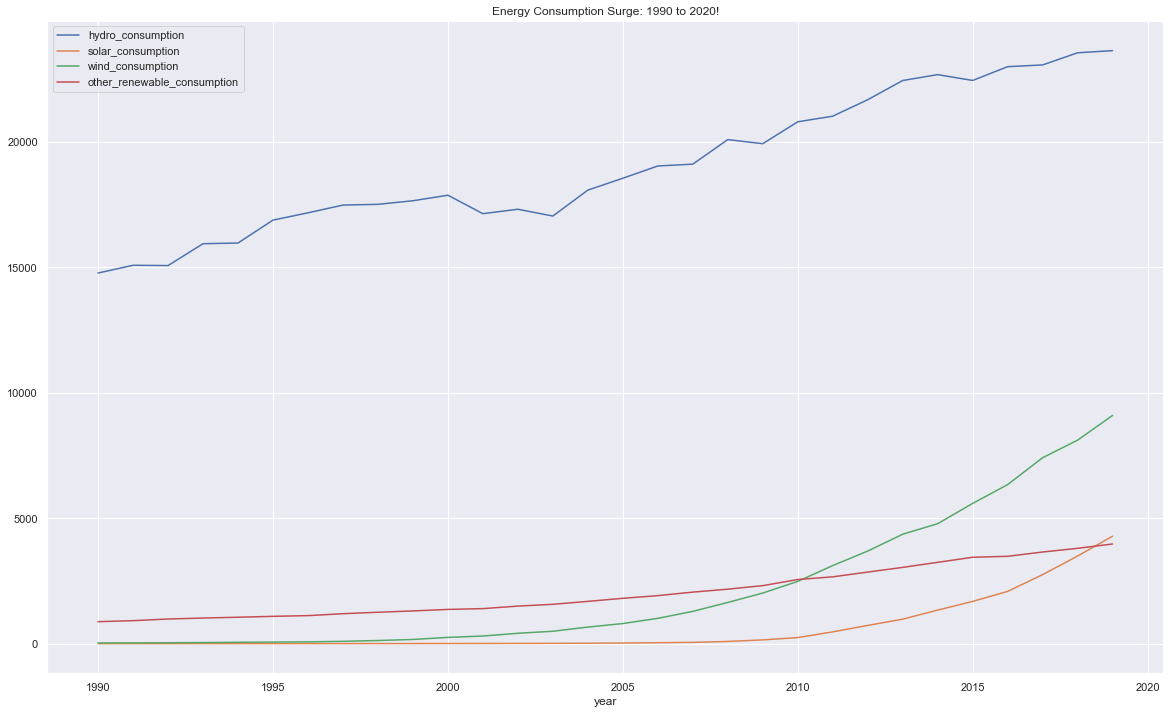

In [8]:
energy_consumption_df.plot(kind = 'line',x = 'year',figsize = (20,12),title='Energy Consumption Surge: 1990 to 2020!');

##### Hydro Consumption trend

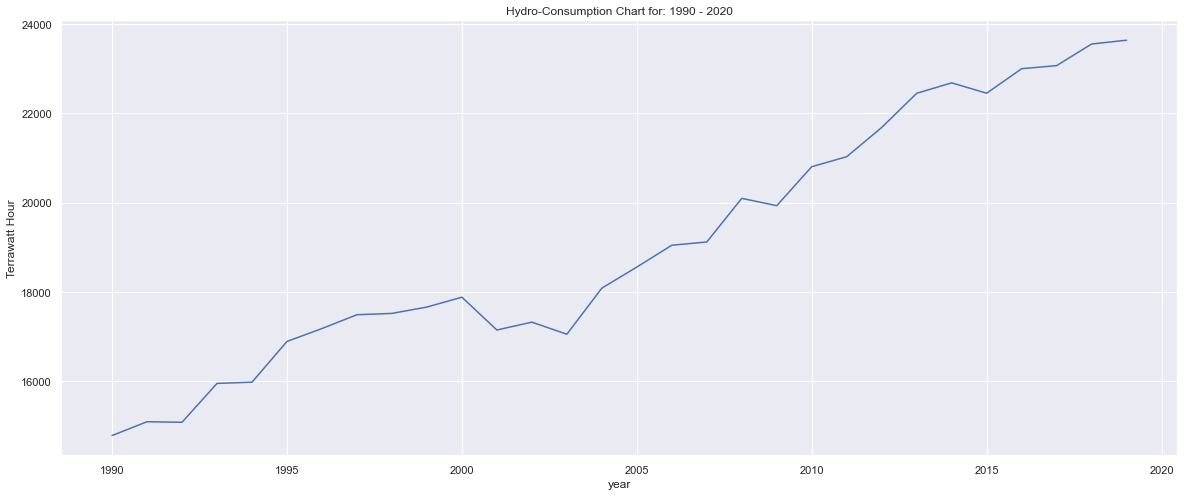

In [9]:
energy_consumption_df.set_index('year')['hydro_consumption'].plot(figsize=(20,8),
                                                 title='Hydro-Consumption Chart for: 1990 - 2020',
                                                ylabel='Terrawatt Hour');

In [10]:
hydro_df = energy_consumption_df.loc[:,['year', 'hydro_consumption']]
hydro_df['year']= to_datetime((hydro_df['year']*10000+1*100+1).apply(str),format='%Y%m%d')
hydro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   year               30 non-null     datetime64[ns]
 1   hydro_consumption  30 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 608.0 bytes


### FB Prophet Modelling

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Initial log joint probability = -92.3935
Iteration  1. Log joint probability =    59.6143. Improved by 152.008.
Iteration  2. Log joint probability =     82.962. Improved by 23.3477.
Iteration  3. Log joint probability =    96.2381. Improved by 13.2761.
Iteration  4. Log joint probability =    96.5392. Improved by 0.301152.
Iteration  5. Log joint probability =    99.9258. Improved by 3.38659.
Iteration  6. Log joint probability =    100.001. Improved by 0.0747659.
Iteration  7. Log joint probability =    100.093. Improved by 0.092635.
Iteration  8. Log joint probability =    100.104. Improved by 0.0106008.
Iteration  9. Log joint probability =    100.107. Improved by 0.003007.
Iteration 10. Log joint probability =    100.107. Improved by 1.67464e-05.
Iteration 11. Log joint probability =    100.108. Improved by 0.000864358.
Iteration 12. Log joint probability =    100.108. Improved by 0.000245863.
Iteration 13. Log joint probability =     100.11. Improved by 0.00205581.
Iteration 14.

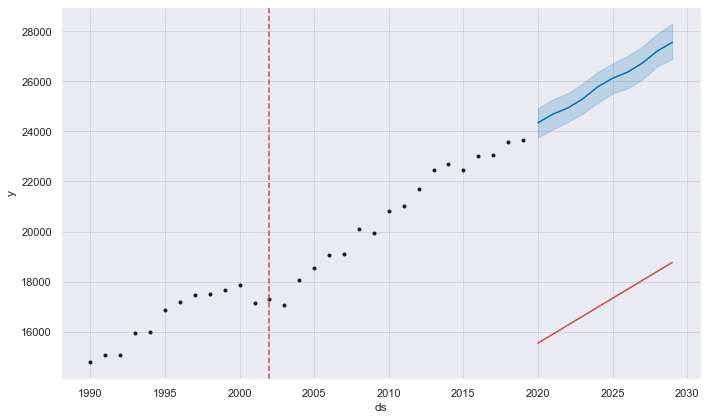

In [11]:
def fb_prophet_modelling(input_df):
    
    # define the model
    model = Prophet(changepoint_range=0.444,yearly_seasonality=True,n_changepoints=3)
    # fit the model -> ValueError: Dataframe must have columns "ds" and "y" with the dates and values respectively.
    input_df = input_df.rename(columns = {'year': 'ds','hydro_consumption':'y'})
    model.fit(input_df)
    
    # define the period for which we want a prediction
    future = list()
    for i in range(0, 10):
        date = f'202{i}-01-01'
        future.append([date])
    future = pd.DataFrame(future)
    future.columns = ['ds']
    future['ds']= to_datetime(future['ds'])
    
    # use the model to make a forecast
    forecast = model.predict(future)
    
    # use the model to make a forecast
    forecast = model.predict(future)
    # calculate MAE between expected and predicted values for december
    y_true = input_df['y'][-10:].values
    y_pred = forecast['yhat'].values
    mae = mean_absolute_error(y_true, y_pred)
    
    return forecast , mae , y_true , y_pred, model

forecast , mae , y_true , y_pred, model = fb_prophet_modelling(hydro_df)
print('MAE: %.3f' % mae)
# plot expected vs actual

# Python
from fbprophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

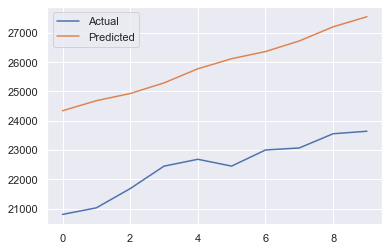

In [12]:
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()